In [1]:
from mvpa.loading import load_TRs, load_betas
from mvpa.decoding import decode_CV, decode_traintest
from mvpa.mvpa_utils import correct_labels
from infocoupling_main import decode_timecourses
from utils import Options
import pandas as pd
import seaborn as sns
from readresults.readres_mvpa import get_subj_avg
import numpy as np
import os
from configs import bids_dir
import pickle as pkl

%load_ext autoreload
%autoreload 2

/home/predatt/giaald/.conda/envs/giacomo37/lib/python3.8/site-packages/mvpa2/datasets/base.py:465: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def __init__(self, shape=None, sid=None, fid=None, dtype=np.float):
/home/predatt/giaald/nipype/nipype/utils/misc.py:9: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Iterator
/home/predatt/giaald/nipype/nipype/interfaces/base/traits_extension.py:22: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.

231003-11:45:29,897 nipype.utils WARNING:
	 A newer version (1.8.4) of nipy/nipype is available. You are using 1.6.0-dev+g804adc0


stty: standard input: Inappropriate ioctl for device


In [35]:
import gzip
with gzip.open('../../infocoupl_wf/batch/crashdump_20231003_', 'rb') as f:
    crashdump = pkl.load(f)

In [36]:
crashdump

{'result': None,
 'hostname': 'dccn-c038.dccn.nl',
 'traceback': ['Traceback (most recent call last):\n',
  '  File "/project/3018040.05/infocoupl_wf/batch/pyscript_20231003_144706_infocoupl_wf_decode_timecourses.a0.py", line 38, in <module>\n    result = info[\'node\'].run(updatehash=info[\'updatehash\'])\n',
  '  File "/home/predatt/giaald/nipype/nipype/pipeline/engine/nodes.py", line 486, in run\n    self._get_hashval()\n',
  '  File "/home/predatt/giaald/nipype/nipype/pipeline/engine/nodes.py", line 538, in _get_hashval\n    self._get_inputs()\n',
  '  File "/home/predatt/giaald/nipype/nipype/pipeline/engine/nodes.py", line 580, in _get_inputs\n    outputs = _load_resultfile(results_fname).outputs\n',
  '  File "/home/predatt/giaald/nipype/nipype/pipeline/engine/utils.py", line 293, in load_resultfile\n    result = loadpkl(results_file)\n',
  '  File "/home/predatt/giaald/nipype/nipype/utils/filemanip.py", line 672, in loadpkl\n    raise e\n',
  '  File "/home/predatt/giaald/nipype

In [21]:
crashdump

{'result': None,
 'hostname': 'dccn-c049.dccn.nl',
 'traceback': ['Traceback (most recent call last):\n',
  '  File "/project/3018040.05/infocoupl_wf/batch/pyscript_20231003_123321_infocoupl_wf_decode_timecourses.a0.py", line 38, in <module>\n    result = info[\'node\'].run(updatehash=info[\'updatehash\'])\n',
  '  File "/home/predatt/giaald/nipype/nipype/pipeline/engine/nodes.py", line 486, in run\n    self._get_hashval()\n',
  '  File "/home/predatt/giaald/nipype/nipype/pipeline/engine/nodes.py", line 538, in _get_hashval\n    self._get_inputs()\n',
  '  File "/home/predatt/giaald/nipype/nipype/pipeline/engine/nodes.py", line 580, in _get_inputs\n    outputs = _load_resultfile(results_fname).outputs\n',
  '  File "/home/predatt/giaald/nipype/nipype/pipeline/engine/utils.py", line 293, in load_resultfile\n    result = loadpkl(results_file)\n',
  '  File "/home/predatt/giaald/nipype/nipype/utils/filemanip.py", line 672, in loadpkl\n    raise e\n',
  '  File "/home/predatt/giaald/nipype

In [15]:
crashdump

{'result': None,
 'hostname': 'dccn-c039.dccn.nl',
 'traceback': ['Traceback (most recent call last):\n',
  '  File "/project/3018040.05/infocoupl_wf/batch/pyscript_20231003_121131_infocoupl_wf_decode_timecourses.a0.py", line 38, in <module>\n    result = info[\'node\'].run(updatehash=info[\'updatehash\'])\n',
  '  File "/home/predatt/giaald/nipype/nipype/pipeline/engine/nodes.py", line 486, in run\n    self._get_hashval()\n',
  '  File "/home/predatt/giaald/nipype/nipype/pipeline/engine/nodes.py", line 538, in _get_hashval\n    self._get_inputs()\n',
  '  File "/home/predatt/giaald/nipype/nipype/pipeline/engine/nodes.py", line 580, in _get_inputs\n    outputs = _load_resultfile(results_fname).outputs\n',
  '  File "/home/predatt/giaald/nipype/nipype/pipeline/engine/utils.py", line 293, in load_resultfile\n    result = loadpkl(results_file)\n',
  '  File "/home/predatt/giaald/nipype/nipype/utils/filemanip.py", line 672, in loadpkl\n    raise e\n',
  '  File "/home/predatt/giaald/nipype

In [7]:
crashdump

{'result': None,
 'hostname': 'dccn-c039.dccn.nl',
 'traceback': ['Traceback (most recent call last):\n',
  '  File "/project/3018040.05/infocoupl_wf/batch/pyscript_20231003_113223_infocoupl_wf_decode_timecourses.a0.py", line 38, in <module>\n    result = info[\'node\'].run(updatehash=info[\'updatehash\'])\n',
  '  File "/home/predatt/giaald/nipype/nipype/pipeline/engine/nodes.py", line 486, in run\n    self._get_hashval()\n',
  '  File "/home/predatt/giaald/nipype/nipype/pipeline/engine/nodes.py", line 538, in _get_hashval\n    self._get_inputs()\n',
  '  File "/home/predatt/giaald/nipype/nipype/pipeline/engine/nodes.py", line 580, in _get_inputs\n    outputs = _load_resultfile(results_fname).outputs\n',
  '  File "/home/predatt/giaald/nipype/nipype/pipeline/engine/utils.py", line 293, in load_resultfile\n    result = loadpkl(results_file)\n',
  '  File "/home/predatt/giaald/nipype/nipype/utils/filemanip.py", line 672, in loadpkl\n    raise e\n',
  '  File "/home/predatt/giaald/nipype

In [3]:
tc = pd.read_csv('example_timecourse_TRs.csv')

In [13]:
import numpy as np
from nipype.interfaces.base import Bunch

subj_info = []

for run in tc.runno.unique():

    regressor_names = []
    regressors = []
    thisrun = tc[tc['runno']==run]
    for i, exp in [(True, 'expected'), (False, 'unexpected')]:
        regressor_names.append(exp)
        thiscond = thisrun[thisrun['expected']==i]
        allTRs = np.zeros((404, 1))
        for _, r in thiscond.iterrows():
            allTRs[r.TRno] = r.distance
        regressors.append(allTRs.tolist())

    subj_info.append(Bunch(conditions=['dummy'], onsets=[[0.0]],
                           durations=[[0.0]], 
                           regressor_names=regressor_names,
                           regressors=regressors))

In [16]:
subj_info[0].regressor_names

['expected', 'unexpected']

In [17]:
subj_info[0].conditions

['dummy']

In [12]:
tc.runno.unique()

array([1, 2, 3, 4, 5, 6, 7])

In [11]:
len(subj_info)

1

In [10]:
subj_info[0].regressors

[[[0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.2153604218378448],
  [-0.2987212873018556],
  [-0.091473582068866],
  [-0.8719593875546252],
  [-0.0117774255492864],
  [0.3127908555218131],
  [-0.5786098250700608],
  [0.4015975189693184],
  [-1.89958824935482],
  [-0.8847526169260951],
  [0.3615530407500304],
  [0.3592304848086416],
  [0.6210834613557893],
  [0.3234921718261451],
  [0.8922302628945991],
  [1.5881539177882826],
  [0.969958242554374],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0539057250401627],
  [-0.1903000855940583],
  [-0.1407698108244668],
  [0.5894234713131312],
  [0.0521076993627758],
  [0.1203351476420165],
  [-0.8281848970111879],
  [0.3762944256444457],
  [0.3905715354021989],
  [0.9938277693090252],
  [0.3520696885301013],
  [0.0311528574001034],
  [-0.5896118379046246],
  [-0.2707313389693626],
  [0.

In [27]:
from glm.modelspec import specify_model_test



In [28]:
a = ['a']
a.extend(['b', 'c'])

In [29]:
a

['a', 'b', 'c']

In [24]:
ooopt = Options()
ooopt.a = 0

In [26]:
ooopt.a

0

In [20]:
xx = pd.DataFrame([{'a': 5, 'b': 1}, {'a': 5, 'b': 1}])

In [23]:
xx.a.unique()[0]

5

In [6]:
opt = Options(sub='sub-001',task='test',model=15)
mask_templ = os.path.join(bids_dir, 'derivatives', 'spm-preproc', 'derivatives', 
                          'roi-masks', '{:s}', '{:s}_ba-17-18_R_contr-objscrvsbas_top-1000.nii')

firDS = load_betas(opt, fir=True, mask_templ=mask_templ, max_delay=5)

  0%|          | 0/1169 [00:00<?, ?it/s]

 * Please note: warnings are printed only once, but underlying problem might occur many times *


100%|██████████| 1169/1169 [12:54<00:00,  1.51it/s]


In [16]:
firDS.sa.keys()

dict_keys(['targets', 'chunks', 'time_indices', 'time_coords', 'bin'])

In [ ]:
subj_info = []
    
for run in tc.runno.unique():

    regressor_names = []
    regressors = []
    thisrun = tc[tc['runno']==run]
    for lab in thisrun.label.unique():
        regressor_names.append(lab)
        thiscond = thisrun[thisrun['label']==lab]
        allTRs = np.zeros((404, 1))
        for _, r in thiscond.iterrows():
            allTRs[r.TRno] = r.distance
        regressors.append(allTRs.tolist())

    subj_info.append(Bunch(conditions=['dummy'], onsets=[[0.0]], durations=[[0.0]],
        regressor_names=regressor_names, regressors=regressors))

In [14]:
firDS.sa.bin

array([ 1,  2,  3, ...,  8,  9, 10])

In [28]:
len(firDS[firDS.sa.basisfunc==2].samples)

112

In [15]:
np.unique(firDS.sa.targets)

array(['A_30_exp_1', 'A_30_exp_1*', 'A_30_exp_2', 'A_30_exp_2*',
       'A_30_exp_3', 'A_30_exp_3*', 'A_30_unexp', 'A_30_unexp*',
       'A_90_exp_1', 'A_90_exp_1*', 'A_90_exp_2', 'A_90_exp_2*',
       'A_90_exp_3', 'A_90_exp_3*', 'A_90_unexp', 'A_90_unexp*',
       'B_30_exp_1', 'B_30_exp_1*', 'B_30_exp_2', 'B_30_exp_2*',
       'B_30_exp_3', 'B_30_exp_3*', 'B_30_unexp', 'B_30_unexp*',
       'B_90_exp_1', 'B_90_exp_1*', 'B_90_exp_2', 'B_90_exp_2*',
       'B_90_exp_3', 'B_90_exp_3*', 'B_90_unexp', 'B_90_unexp*'],
      dtype='<U11')

In [30]:
from glob import glob
from utils import loadmat
from configs import bids_dir
import os

In [31]:
data_dir = os.path.join(bids_dir, 'derivatives/spm-preproc/derivatives/spm-stats/betas/sub-001/test/model_12/FIR')
SPM = loadmat(os.path.join(data_dir, 'SPM.mat'))

In [32]:
len(SPM['SPM']['xX']['name'])

1169

In [33]:
bf1names = [n for n in SPM['SPM']['xX']['name'] if 'bf(1)' in n]

In [37]:
len(bf1names)/16

7.0

In [35]:
bf1names

['Sn(1) A_30_exp_1*bf(1)',
 'Sn(1) A_30_exp_2*bf(1)',
 'Sn(1) A_30_exp_3*bf(1)',
 'Sn(1) A_30_unexp*bf(1)',
 'Sn(1) A_90_exp_1*bf(1)',
 'Sn(1) A_90_exp_2*bf(1)',
 'Sn(1) A_90_exp_3*bf(1)',
 'Sn(1) A_90_unexp*bf(1)',
 'Sn(1) B_30_exp_1*bf(1)',
 'Sn(1) B_30_exp_2*bf(1)',
 'Sn(1) B_30_exp_3*bf(1)',
 'Sn(1) B_30_unexp*bf(1)',
 'Sn(1) B_90_exp_1*bf(1)',
 'Sn(1) B_90_exp_2*bf(1)',
 'Sn(1) B_90_exp_3*bf(1)',
 'Sn(1) B_90_unexp*bf(1)',
 'Sn(2) A_30_exp_1*bf(1)',
 'Sn(2) A_30_exp_2*bf(1)',
 'Sn(2) A_30_exp_3*bf(1)',
 'Sn(2) A_30_unexp*bf(1)',
 'Sn(2) A_90_exp_1*bf(1)',
 'Sn(2) A_90_exp_2*bf(1)',
 'Sn(2) A_90_exp_3*bf(1)',
 'Sn(2) A_90_unexp*bf(1)',
 'Sn(2) B_30_exp_1*bf(1)',
 'Sn(2) B_30_exp_2*bf(1)',
 'Sn(2) B_30_exp_3*bf(1)',
 'Sn(2) B_30_unexp*bf(1)',
 'Sn(2) B_90_exp_1*bf(1)',
 'Sn(2) B_90_exp_2*bf(1)',
 'Sn(2) B_90_exp_3*bf(1)',
 'Sn(2) B_90_unexp*bf(1)',
 'Sn(3) A_30_exp_1*bf(1)',
 'Sn(3) A_30_exp_2*bf(1)',
 'Sn(3) A_30_exp_3*bf(1)',
 'Sn(3) A_30_unexp*bf(1)',
 'Sn(3) A_90_exp_1*bf(1)',
 

In [7]:
regr_names = [n[6:] for n in SPM['SPM']['xX']['name']]

In [6]:
file_names = [os.path.join(data_dir, b.fname) for b in SPM['SPM']['Vbeta']]

In [50]:
exclude = ['buttonpress', 'constant', 'tx', 'ty', 'tz', 'rx', 'ry', 'rz']
for r in regr_names:
    if r not in exclude:
        assert '*bf' in r

In [55]:
file_names[0]

'/project/3018040.05/bids/derivatives/spm-preproc/derivatives/spm-stats/betas/sub-001/test/model_12/FIR/beta_0001.nii'

In [51]:
from mvpa2.datasets import mri

In [65]:
thisDS = mri.fmri_dataset(file_names[0], chunks=1)

In [66]:
regr_names[0]

'A_30_exp_1*bf(1)'

In [94]:
a = int(re.search(r'.*bf\((\d+)\)', "A_30_exp_1*bf(10)").group(1))

In [61]:
thisDS.sa.chunks

array([1])

In [64]:
thisDS.sa['basisfunc'] = [1]

In [49]:
len(file_names)

1169

In [22]:
import re
m = re.search('firlength(\d+)', '_bases_firlength20.order10')

In [25]:
m.group(1)

'20'

In [26]:
from nipype.interfaces.io import DataSink

In [2]:
sub = 'sub-001'
task = ('train', 'test')
model = (5, 15)
roi = 'ba-17-18_L_contr-objscrvsbas_top-1000'
approach = 'traintest'

allres = decode_timecourses(sub, roi, task, model, approach)

 * Please note: warnings are printed only once, but underlying problem might occur many times *


In [14]:
avgres = []
for d in sorted(allres.delay.unique()):
    thisdel = allres[allres['delay']==d]
    thisdel = get_subj_avg(thisdel, avg_decodedirs=False)
    avgres.append(thisdel)
avgres = pd.concat(avgres)

In [15]:
avgres = avgres.groupby(['delay', 'expected']).mean().reset_index()

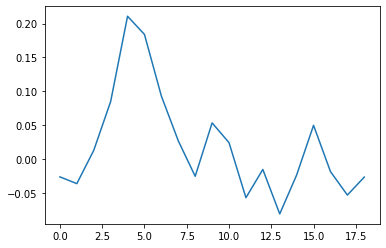

In [13]:
import matplotlib.pyplot as plt

plt.plot(avgres['delay'], avgres['distance'])

<AxesSubplot:xlabel='delay', ylabel='distance'>

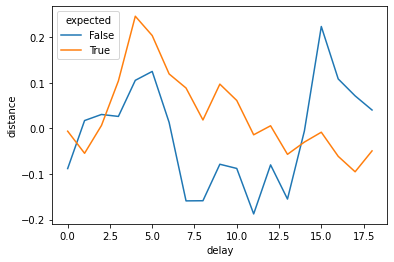

In [17]:
sns.lineplot(data=avgres, x='delay', y='distance', hue='expected')

In [ ]:
allres.delay

In [ ]:
opt = Options(
    sub='sub-001',
    task='test',
    model=15,
)

In [ ]:
DS = load_TRs(opt, TR_delay=[6, 7, 8, 9])
DS = correct_labels(DS, opt)

In [ ]:
DS = DS.remove_nonfinite_features()

In [ ]:
allres = []

for d in [6, 7]:
    print('delay:', d)
    thisDS = DS[DS.sa.delay==d]
    allres.append(decode_CV(thisDS, opt))

In [ ]:
allres[0]

In [ ]:
allresdf = pd.concat(allres)

In [ ]:
allresdf.delay.unique()

In [ ]:
DS[DS.sa.chunks==1].sa.delay